In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../Tetrahymena_Data/Tetrahymena_SJB_90', index_col='Unnamed: 0')

In [3]:
df.shape

(1995, 448)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('Dependent', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_feats = scaler.transform(df.drop('Dependent', axis=1))

In [8]:
df_feats = pd.DataFrame(scaled_feats, columns=df.columns[1:])

In [9]:
df_feats.head()

,nAcid,nN,nS,nX,ATS0m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,...,VR2_D,VR3_D,TopoPSA,MW,AMW,WTPT-3,WTPT-4,WPATH,WPOL,XLogP
0,-0.209531,-0.714601,-0.256401,4.100852,0.686096,3.975024,-1.217895,-0.820034,-0.944435,-0.740569,...,4.651234,0.361676,-1.650072,0.017058,6.175410,0.675649,-1.187485,-0.990363,-1.779125,0.382170
1,-0.209531,0.602986,-0.256401,0.655653,1.310228,-0.406501,0.057718,-0.820034,-0.944435,-0.740569,...,-0.434993,-1.005337,0.402123,-0.250284,3.217247,0.880535,0.343143,-0.975374,-1.434192,-0.854076
2,-0.209531,-0.714601,-0.256401,-0.492747,-0.752538,-1.884927,-1.216412,-0.820034,-0.944435,-0.740569,...,-0.435004,-1.261489,-0.687719,-2.457414,-0.859349,-1.101893,-0.525750,-1.102782,-1.779125,-1.764188
3,-0.209531,1.920572,-0.256401,-0.492747,-0.634112,-1.560036,-1.080855,-0.805639,-0.944435,-0.740569,...,-0.434995,-1.092426,0.972019,-1.879184,-0.250671,0.213991,-0.422962,-1.035330,-1.606658,-2.418370
4,-0.209531,1.920572,3.423597,-0.492747,-0.401157,-1.037483,-1.127506,-0.818328,-0.944435,-0.740569,...,4.333344,0.009256,2.352041,-1.549310,0.310467,0.099738,-1.187485,-1.042825,-1.779125,-1.956932


In [10]:
X = df_feats
y = df['Dependent']

In [11]:
kf = KFold(n_splits=10, shuffle=True, random_state=101)

## Default SVM Parameters

In [106]:
svm = SVR()

Default Parameters 

KFold R2:  0.7456750660899238
KFold MAE:  0.36327826287908704
KFold MSE:  0.27618396184496363
KFold RMSE:  0.5255320749915876


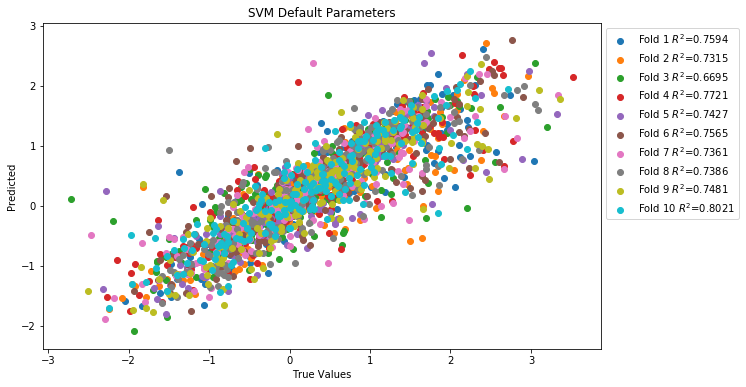

In [107]:
r2_model, mae_model, mse_model, train_r2_model = list(), list(), list(), list()

plt.figure(figsize=(10,6))
plt.title('SVM Default Parameters')
plt.ylabel('Predicted')
plt.xlabel('True Values')

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = svm.fit(X_train, y_train)
    
    lab = 'Fold %d $R^2$=%.4f' % (i+1, r2_score(y_test, model.predict(X_test)))
    plt.scatter(y_test, model.predict(X_test), label=lab)
    
    r2_model.append(r2_score(y_test, model.predict(X_test)))
    mae_model.append(mean_absolute_error(y_test, model.predict(X_test)))
    mse_model.append(mean_squared_error(y_test, model.predict(X_test)))
    train_r2_model.append(r2_score(y_train, model.predict(X_train)))
    
r2_default = np.mean(r2_model)
mae_default = np.mean(mae_model)
mse_default = np.mean(mse_model)
rmse_default = np.sqrt(mse_default)
train_r2_default = np.mean(train_r2_model)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/SVM_Default_Parameters.png', bbox_inches='tight')

print('Default Parameters', '\n')
print('KFold R2: ', r2_default)
print('KFold MAE: ', mae_default)
print('KFold MSE: ', mse_default)
print('KFold RMSE: ', rmse_default)

In [104]:
print('R2 Train', train_r2_default)

R2 Train 0.9015414919843323


# Manual Parameter Tuning
## kernel
### default='rbf'
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to precompute the kernel matrix.

In [21]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
r2_kernel = []

for i in kernel:
    
    svm = SVR(kernel=i)
    r2_model = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        model = svm.fit(X_train, y_train)
    
        r2_model.append(r2_score(y_test, model.predict(X_test)))
    
    r2_kernel.append(np.mean(r2_model))    

print('Default R2: ', r2_default)
print('Optimal R2', max(r2_kernel))
print('kernel: ', kerel[r2_kernel.index(max(r2_kernel))])

Default R2:  0.7456750660899238
Optimal R2 0.7456750660899238
kernel:  rbf


Text(0, 0.5, '$R^2$ Score')

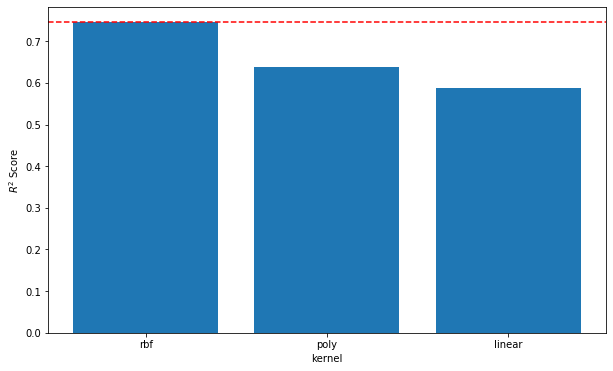

In [26]:
plt.figure(figsize=(10,6))
plt.bar(kernel[2::-1], r2_kernel[2::-1])
plt.axhline(r2_default, linestyle='--', color='r', label='$R^2$ Default')
plt.xlabel('kernel')
plt.ylabel('$R^2$ Score')

In [64]:
gamma = []
train_r2_gamma, test_r2_gamma, mse_gamma = list(), list(), list()


for i in np.linspace(0.0001, 0.01, 26):
    
    gamma.append(i)
    svm = SVR(gamma=i)
    train_r2_model, test_r2_model, mse_model = list(), list(), list()

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        model = svm.fit(X_train, y_train)
    
        train_r2_model.append(r2_score(y_train, model.predict(X_train)))
        test_r2_model.append(r2_score(y_test, model.predict(X_test)))
        mse_model.append(mean_squared_error(y_test, model.predict(X_test)))
    
    train_r2_gamma.append(np.mean(train_r2_model))
    test_r2_gamma.append(np.mean(test_r2_model))
    mse_gamma.append(np.mean(mse_model)) 

print('Default R2: ', r2_default)
print('Optimal R2', max(test_r2_gamma))
print('gamma: ', gamma[test_r2_gamma.index(max(test_r2_gamma))])
print('Optimal R2 Train: ', train_r2_gamma[test_r2_gamma.index(max(test_r2_gamma))])
print('MSE: ', mse_gamma[test_r2_gamma.index(max(test_r2_gamma))])

Default R2:  0.7456750660899238
Optimal R2 0.7512300984453578
gamma:  0.0016840000000000002


In [95]:
print('Default R2: ', r2_default)
print('Optimal R2', max(test_r2_gamma))
print('gamma: ', gamma[test_r2_gamma.index(max(test_r2_gamma))])
print('Optimal R2 Train: ', train_r2_gamma[test_r2_gamma.index(max(test_r2_gamma))])
print('MSE: ', mse_gamma[test_r2_gamma.index(max(test_r2_gamma))])

Default R2:  0.7456750660899238
Optimal R2 0.7512300984453578
gamma:  0.0016840000000000002
Optimal R2 Train:  0.8825439480615517
MSE:  0.2698293876785655


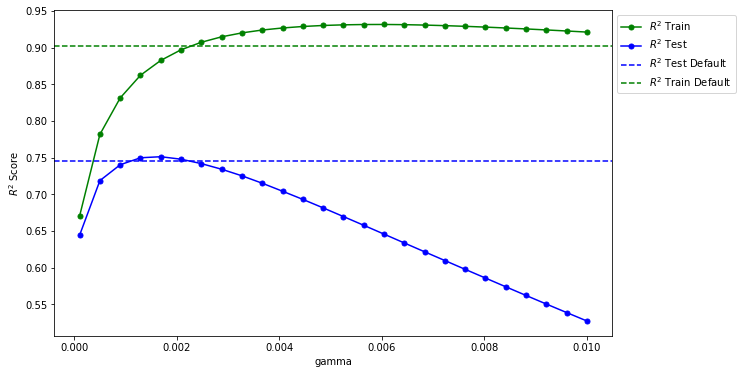

In [84]:
plt.figure(figsize=(10,6))
plt.plot(gamma, train_r2_gamma, color='g', linestyle='-', marker='o', markerfacecolor='g', markersize=5,label='$R^2$ Train')
plt.plot(gamma, test_r2_gamma, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
plt.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
plt.axhline(train_r2_default, linestyle='--', color='g', label='$R^2$ Train Default')
plt.xlabel('gamma')
plt.ylabel('$R^2$ Score')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/SVM_gamma_R2.png', bbox_inches='tight')

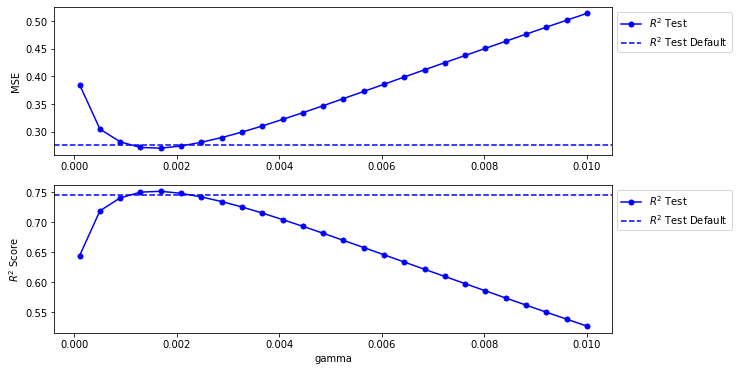

In [83]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,6))
ax2.plot(gamma, test_r2_gamma, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax2.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax2.set_xlabel('gamma')
ax2.set_ylabel('$R^2$ Score')
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax1.plot(gamma, mse_gamma, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax1.axhline(mse_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax1.set_ylabel('MSE')
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/SVM_gamma_MSE_R2.png', bbox_inches='tight')

In [68]:
C = [0.5, 0.6, 0.7, 0.8, 0.9]
C.extend(list(range(1,11)))
C.extend(list(range(20,60,10)))
train_r2_C, test_r2_C, mse_C = list(), list(), list()

for i in C:
    
    svm = SVR(C=i)
    train_r2_model, test_r2_model, mse_model = list(), list(), list()

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        model = svm.fit(X_train, y_train)
    
        train_r2_model.append(r2_score(y_train, model.predict(X_train)))
        test_r2_model.append(r2_score(y_test, model.predict(X_test)))
        mse_model.append(mean_squared_error(y_test, model.predict(X_test)))
    
    train_r2_C.append(np.mean(train_r2_model))
    test_r2_C.append(np.mean(test_r2_model))
    mse_C.append(np.mean(mse_model)) 

print('Default R2: ', r2_default)
print('Optimal R2', max(test_r2_C))
print('C: ', C[test_r2_C.index(max(test_r2_C))])
print('Optimal R2 Train: ', train_r2_C[test_r2_C.index(max(test_r2_C))])
print('MSE: ', mse_C[test_r2_C.index(max(test_r2_C))])

Default R2:  0.7456750660899238
Optimal R2 0.7795788879365245
C:  5


In [96]:
print('Default R2: ', r2_default)
print('Optimal R2', max(test_r2_C))
print('C: ', C[test_r2_C.index(max(test_r2_C))])
print('Optimal R2 Train: ', train_r2_C[test_r2_C.index(max(test_r2_C))])
print('MSE: ', mse_C[test_r2_C.index(max(test_r2_C))])

Default R2:  0.7456750660899238
Optimal R2 0.7795788879365245
C:  5
Optimal R2 Train:  0.9810581612103209
MSE:  0.23928264956872156


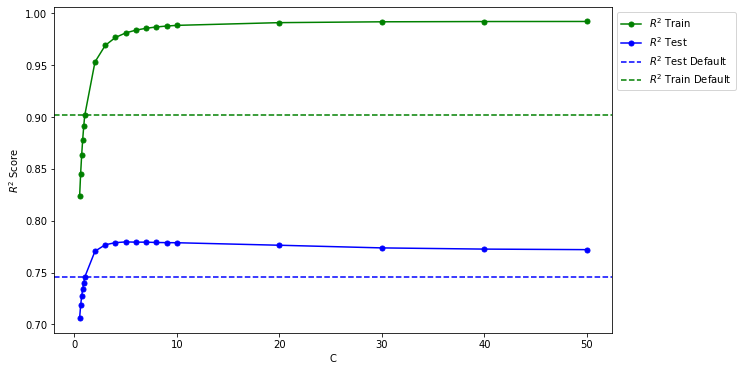

In [85]:
plt.figure(figsize=(10,6))
plt.plot(C, train_r2_C, color='g', linestyle='-', marker='o', markerfacecolor='g', markersize=5,label='$R^2$ Train')
plt.plot(C, test_r2_C, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
plt.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
plt.axhline(train_r2_default, linestyle='--', color='g', label='$R^2$ Train Default')
plt.xlabel('C')
plt.ylabel('$R^2$ Score')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/SVM_C_R2.png', bbox_inches='tight')

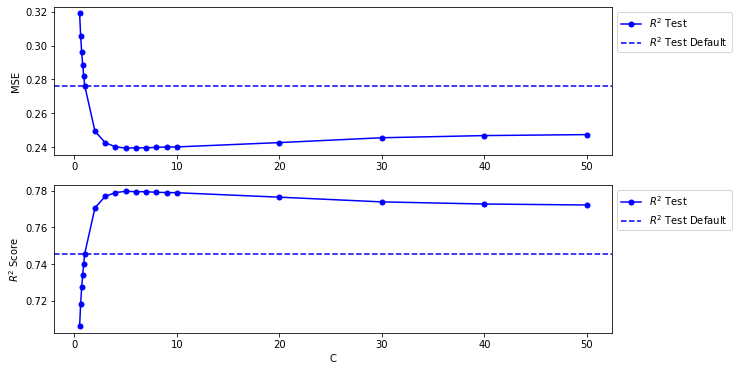

In [86]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,6))
ax2.plot(C, test_r2_C, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax2.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax2.set_xlabel('C')
ax2.set_ylabel('$R^2$ Score')
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax1.plot(C, mse_C, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax1.axhline(mse_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax1.set_ylabel('MSE')
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/SVM_C_MSE_R2.png', bbox_inches='tight')

In [72]:
epsilon = []
train_r2_epsilon, test_r2_epsilon, mse_epsilon = list(), list(), list()

for i in np.linspace(0.001, 1, 50):
    
    epsilon.append(i)
    
    svm = SVR(epsilon=i)
    train_r2_model, test_r2_model, mse_model = list(), list(), list()

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        model = svm.fit(X_train, y_train)
    
        train_r2_model.append(r2_score(y_train, model.predict(X_train)))
        test_r2_model.append(r2_score(y_test, model.predict(X_test)))
        mse_model.append(mean_squared_error(y_test, model.predict(X_test)))
    
    train_r2_epsilon.append(np.mean(train_r2_model))
    test_r2_epsilon.append(np.mean(test_r2_model))
    mse_epsilon.append(np.mean(mse_model))

print('Default R2: ', r2_default)
print('Optimal R2', max(test_r2_epsilon))
print('epsilon: ', epsilon[test_r2_epsilon.index(max(test_r2_epsilon))])
print('Optimal R2 Train: ', train_r2_epsilon[test_r2_epsilon.index(max(test_r2_epsilon))])
print('MSE: ', mse_epsilon[test_r2_epsilon.index(max(test_r2_epsilon))])

Default R2:  0.7456750660899238
Optimal R2 0.7459111362393989
epsilon:  0.041775510204081635


In [97]:
print('Default R2: ', r2_default)
print('Optimal R2', max(test_r2_epsilon))
print('epsilon: ', epsilon[test_r2_epsilon.index(max(test_r2_epsilon))])
print('Optimal R2 Train: ', train_r2_epsilon[test_r2_epsilon.index(max(test_r2_epsilon))])
print('MSE: ', mse_epsilon[test_r2_epsilon.index(max(test_r2_epsilon))])

Default R2:  0.7456750660899238
Optimal R2 0.7459111362393989
epsilon:  0.041775510204081635
Optimal R2 Train:  0.9023811418818042
MSE:  0.27587071873646996


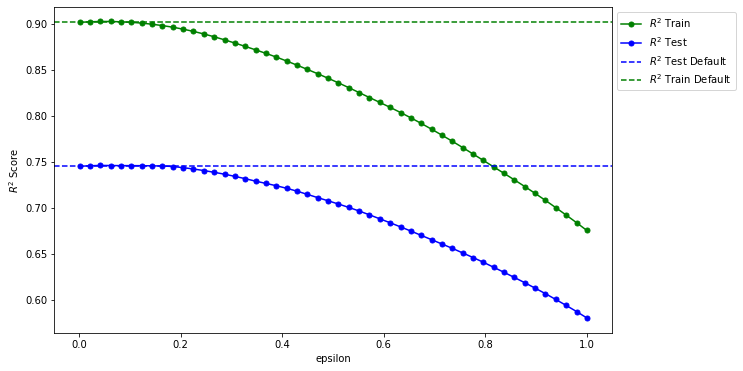

In [87]:
plt.figure(figsize=(10,6))
plt.plot(epsilon, train_r2_epsilon, color='g', linestyle='-', marker='o', markerfacecolor='g', markersize=5,label='$R^2$ Train')
plt.plot(epsilon, test_r2_epsilon, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
plt.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
plt.axhline(train_r2_default, linestyle='--', color='g', label='$R^2$ Train Default')
plt.xlabel('epsilon')
plt.ylabel('$R^2$ Score')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/SVM_epsilon_R2.png', bbox_inches='tight')

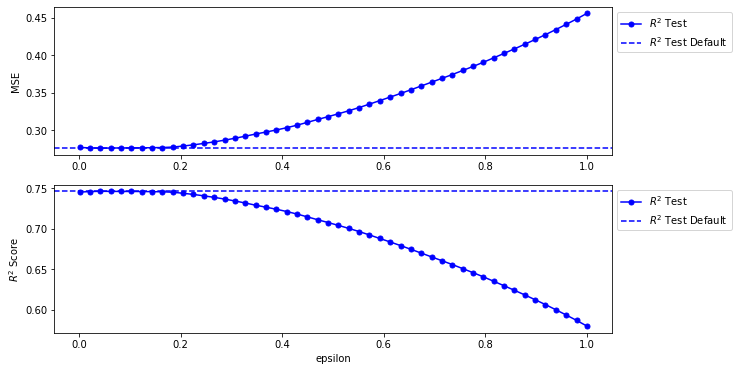

In [88]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,6))
ax2.plot(epsilon, test_r2_epsilon, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax2.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax2.set_xlabel('epsilon')
ax2.set_ylabel('$R^2$ Score')
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax1.plot(epsilon, mse_epsilon, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax1.axhline(mse_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax1.set_ylabel('MSE')
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/SVM_epsilon_MSE_R2.png', bbox_inches='tight')

Manual Parameters 

KFold R2 Test:  0.7944628836648385
KFold R2 Train:  0.9740314071192169
KFold MAE:  0.3256587003407022
KFold MSE:  0.22313107221939923
KFold RMSE:  0.47236751816715683


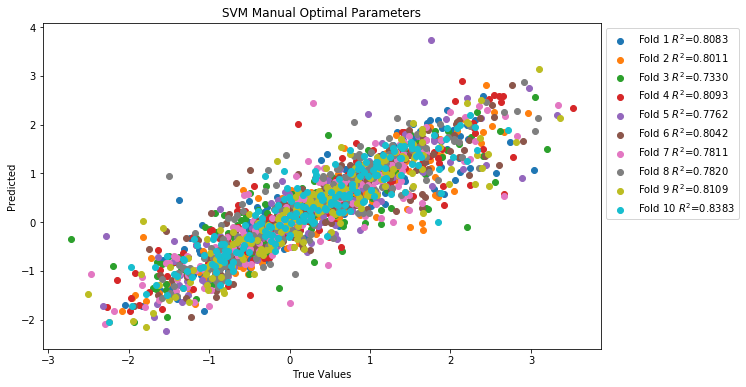

In [98]:
svm_mopt = SVR(gamma=0.0016840000000000002, C=5, epsilon=0.041775510204081635)
r2_mopt, mae_mopt, mse_mopt, train_r2_mopt = list(), list(), list(), list()

plt.figure(figsize=(10,6))
plt.title('SVM Manual Optimal Parameters')
plt.ylabel('Predicted')
plt.xlabel('True Values')

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = svm_mopt.fit(X_train, y_train)
    
    lab = 'Fold %d $R^2$=%.4f' % (i+1, r2_score(y_test, model.predict(X_test)))
    plt.scatter(y_test, model.predict(X_test), label=lab)
    
    r2_mopt.append(r2_score(y_test, model.predict(X_test)))
    mae_mopt.append(mean_absolute_error(y_test, model.predict(X_test)))
    mse_mopt.append(mean_squared_error(y_test, model.predict(X_test)))
    train_r2_mopt.append(r2_score(y_train, model.predict(X_train)))
    
r2_manual = np.mean(r2_mopt)
mae_manual = np.mean(mae_mopt)
mse_manual = np.mean(mse_mopt)
rmse_manual = np.sqrt(mse_manual)
train_r2_manual = np.mean(train_r2_mopt)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/SVM_Manual_Parameters.png', bbox_inches='tight')

print('Manual Parameters', '\n')
print('KFold R2 Test: ', r2_manual)
print('KFold R2 Train: ', train_r2_manual)
print('KFold MAE: ', mae_manual)
print('KFold MSE: ', mse_manual)
print('KFold RMSE: ', rmse_manual)

# GridSearch Parameter Tuning

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
gamma = np.linspace(0.0012, 0.003, 50)
C = np.linspace(1, 10, 20)
epsilon = np.linspace(0.001, 0.02, 20)

param_grid = {'gamma': gamma, 'C': C, 'epsilon': epsilon}

In [47]:
cv = KFold(n_splits=10, shuffle=True, random_state=101)
svm_gs = SVR()

random_grid = RandomizedSearchCV(estimator=svm_gs, 
                                 param_distributions=param_grid, 
                                 cv=cv, 
                                 n_iter=50,
                                 scoring='r2',
                                 verbose=3,
                                 return_train_score=True,
                                 random_state=42)

In [48]:
random_grid.fit(X, y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] gamma=0.002853061224489796, epsilon=0.016, C=8.105263157894736 ..


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  gamma=0.002853061224489796, epsilon=0.016, C=8.105263157894736, score=(train=0.996, test=0.778), total=   2.3s
[CV] gamma=0.002853061224489796, epsilon=0.016, C=8.105263157894736 ..


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV]  gamma=0.002853061224489796, epsilon=0.016, C=8.105263157894736, score=(train=0.996, test=0.789), total=   2.1s
[CV] gamma=0.002853061224489796, epsilon=0.016, C=8.105263157894736 ..


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s


[CV]  gamma=0.002853061224489796, epsilon=0.016, C=8.105263157894736, score=(train=0.996, test=0.691), total=   2.2s
[CV] gamma=0.002853061224489796, epsilon=0.016, C=8.105263157894736 ..
[CV]  gamma=0.002853061224489796, epsilon=0.016, C=8.105263157894736, score=(train=0.995, test=0.790), total=   2.1s
[CV] gamma=0.002853061224489796, epsilon=0.016, C=8.105263157894736 ..
[CV]  gamma=0.002853061224489796, epsilon=0.016, C=8.105263157894736, score=(train=0.995, test=0.750), total=   2.2s
[CV] gamma=0.002853061224489796, epsilon=0.016, C=8.105263157894736 ..
[CV]  gamma=0.002853061224489796, epsilon=0.016, C=8.105263157894736, score=(train=0.996, test=0.768), total=   2.2s
[CV] gamma=0.002853061224489796, epsilon=0.016, C=8.105263157894736 ..
[CV]  gamma=0.002853061224489796, epsilon=0.016, C=8.105263157894736, score=(train=0.996, test=0.753), total=   2.1s
[CV] gamma=0.002853061224489796, epsilon=0.016, C=8.105263157894736 ..
[CV]  gamma=0.002853061224489796, epsilon=0.016, C=8.1052631

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 31.2min finished


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'C': array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,...
       0.00211837, 0.0021551 , 0.00219184, 0.00222857, 0.00226531,
       0.00230204, 0.00233878, 0.00237551, 0.00241224, 0.00244898,
       0.00248571, 0.00252245, 0.00255918, 0.00259592, 0.00263265,
       0.00266939, 0.00270612, 0.00274286, 0.00277959, 0.00281633,
       0.00285306, 0.0028898 , 0.00292653, 0.00296327, 0.003     ])},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   retur

In [49]:
random_grid.best_params_

{'gamma': 0.0012, 'epsilon': 0.018000000000000002, 'C': 8.578947368421051}

GridSearch Parameters 

KFold Test R2:  0.8037960585496137
KFold Train R2:  0.9727698263867584
KFold MAE:  0.31942220015170925
KFold MSE:  0.21286937054216665
KFold RMSE:  0.4613776875209362


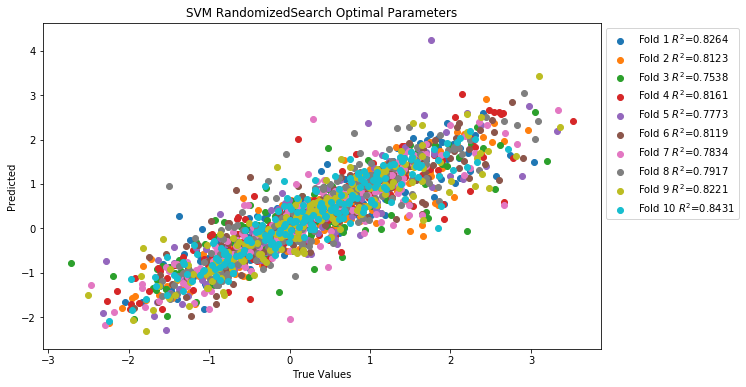

In [129]:
svm_gsopt = random_grid.best_estimator_
r2_gsopt, mae_gsopt, mse_gsopt, train_r2_gsopt = list(), list(), list(), list()

plt.figure(figsize=(10,6))
plt.title('SVM RandomizedSearch Optimal Parameters')
plt.ylabel('Predicted')
plt.xlabel('True Values')

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = svm_gsopt.fit(X_train, y_train)
    
    lab = 'Fold %d $R^2$=%.4f' % (i+1, r2_score(y_test, model.predict(X_test)))
    plt.scatter(y_test, model.predict(X_test), label=lab)
    
    r2_gsopt.append(r2_score(y_test, model.predict(X_test)))
    mae_gsopt.append(mean_absolute_error(y_test, model.predict(X_test)))
    mse_gsopt.append(mean_squared_error(y_test, model.predict(X_test)))
    train_r2_gsopt.append(r2_score(y_train, model.predict(X_train)))
    
r2_grid = np.mean(r2_gsopt)
mae_grid = np.mean(mae_gsopt)
mse_grid = np.mean(mse_gsopt)
rmse_grid = np.sqrt(mse_grid)
train_r2_grid = np.mean(train_r2_gsopt)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/SVM_Random_Parameters.png', bbox_inches='tight')

print('GridSearch Parameters', '\n')
print('KFold Test R2: ', r2_grid)
print('KFold Train R2: ', train_r2_grid)
print('KFold MAE: ', mae_grid)
print('KFold MSE: ', mse_grid)
print('KFold RMSE: ', rmse_grid)

In [51]:
gs_cv = pd.DataFrame(random_grid.cv_results_)

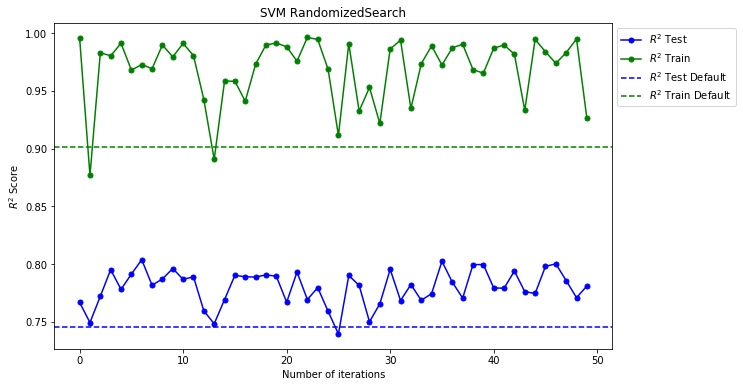

In [105]:
plt.figure(figsize=(10,6))
plt.plot(gs_cv['mean_test_score'], color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
plt.plot(gs_cv['mean_train_score'], color='g', linestyle='-', marker='o', markerfacecolor='g', markersize=5, label='$R^2$ Train')
plt.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
plt.axhline(train_r2_default, linestyle='--', color='g', label='$R^2$ Train Default')
plt.ylabel('$R^2$ Score')
plt.xlabel('Number of iterations')
plt.title('SVM RandomizedSearch')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/SVM_RandomizedSearchCV.png', bbox_inches='tight')

In [108]:
import optuna

In [120]:
def objective(trial):
    
    svm_gamma = trial.suggest_loguniform('gamma', 0.0012, 0.003)
    svm_C = trial.suggest_loguniform('C', 1, 20)
    svm_epsilon = trial.suggest_float('epsilon', 0.001, 0.02)
    svm = SVR(gamma=svm_gamma, C=svm_C, epsilon=svm_epsilon)
    
    mse_model = list()

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = svm.fit(X_train, y_train)

        mse_model.append(mean_squared_error(y_test, model.predict(X_test)))

    return np.mean(mse_model)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2021-06-15 13:27:07,684] A new study created in memory with name: no-name-2c83ee31-c626-474e-9483-16fa6c776ca6
[I 2021-06-15 13:27:28,916] Trial 0 finished with value: 0.22591373517927155 and parameters: {'gamma': 0.0013343489649981035, 'C': 3.6391724107701493, 'epsilon': 0.0034287754601071397}. Best is trial 0 with value: 0.22591373517927155.
[I 2021-06-15 13:27:48,482] Trial 1 finished with value: 0.2488595955885246 and parameters: {'gamma': 0.0012165676788633544, 'C': 1.7720571004023995, 'epsilon': 0.008605094143910348}. Best is trial 0 with value: 0.22591373517927155.
[I 2021-06-15 13:28:08,165] Trial 2 finished with value: 0.24943067154796691 and parameters: {'gamma': 0.0019807354753999993, 'C': 1.693537700881751, 'epsilon': 0.010029587370305435}. Best is trial 0 with value: 0.22591373517927155.
[I 2021-06-15 13:28:28,734] Trial 3 finished with value: 0.23147902388398506 and parameters: {'gamma': 0.001768367441936869, 'C': 2.9649661820932653, 'epsilon': 0.006507994629055731}. B

'gamma': 0.0012023928246223262, 'C': 10.036305565481202, 'epsilon': 0.015289696363609249

'gamma': 0.0012064636272142357, 'C': 9.938026394649398, 'epsilon': 0.00852442026899453

In [121]:
svm_optuna = SVR(gamma=0.0012064636272142357, C=9.938026394649398, epsilon=0.00852442026899453)

Optuna Parameters 

KFold R2:  0.8038669112912112
KFold R2 Train:  0.9765673967620743
KFold MAE:  0.3194858163805047
KFold MSE:  0.21273970530402178
KFold RMSE:  0.461237146491934


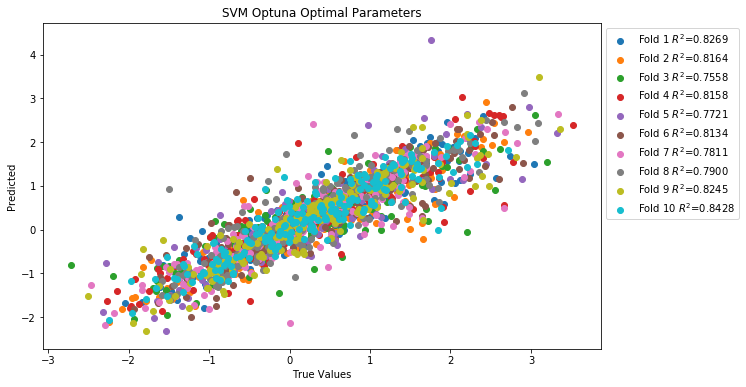

In [128]:
kf = KFold(n_splits=10, shuffle=True, random_state=101)

r2_opt, mae_opt, mse_opt, train_r2_opt = list(), list(), list(), list()

plt.figure(figsize=(10,6))
plt.title('SVM Optuna Optimal Parameters')
plt.ylabel('Predicted')
plt.xlabel('True Values')

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = svm_optuna.fit(X_train, y_train)
    
    lab = 'Fold %d $R^2$=%.4f' % (i+1, r2_score(y_test, model.predict(X_test)))
    plt.scatter(y_test, model.predict(X_test), label=lab)
    
    r2_opt.append(r2_score(y_test, model.predict(X_test)))
    mae_opt.append(mean_absolute_error(y_test, model.predict(X_test)))
    mse_opt.append(mean_squared_error(y_test, model.predict(X_test)))
    train_r2_opt.append(r2_score(y_train, model.predict(X_train)))
    
r2_optuna = np.mean(r2_opt)
mae_optuna = np.mean(mae_opt)
mse_optuna = np.mean(mse_opt)
rmse_optuna = np.sqrt(mse_optuna)
train_r2_optuna = np.mean(train_r2_opt)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/SVM_Optuna.png', bbox_inches='tight')

print('Optuna Parameters', '\n')
print('KFold R2: ', r2_optuna)
print('KFold R2 Train: ', train_r2_optuna)
print('KFold MAE: ', mae_optuna)
print('KFold MSE: ', mse_optuna)
print('KFold RMSE: ', rmse_optuna)

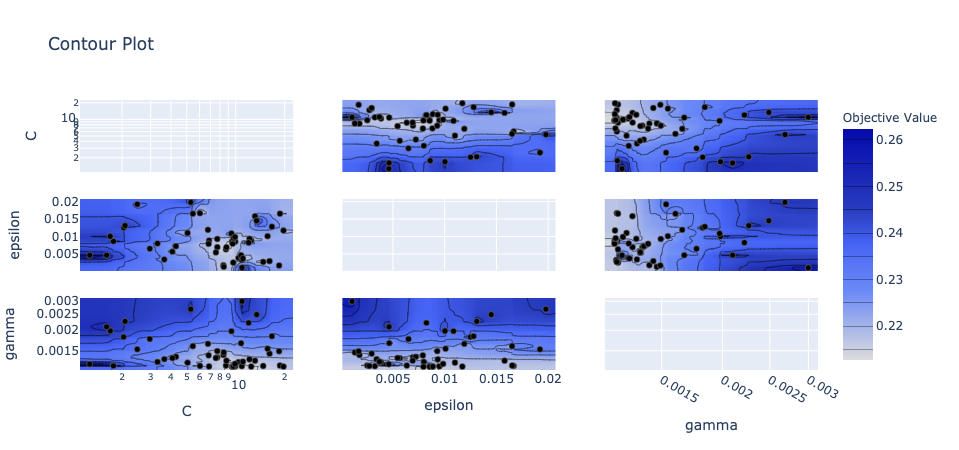

In [123]:
optuna.visualization.plot_contour(study)

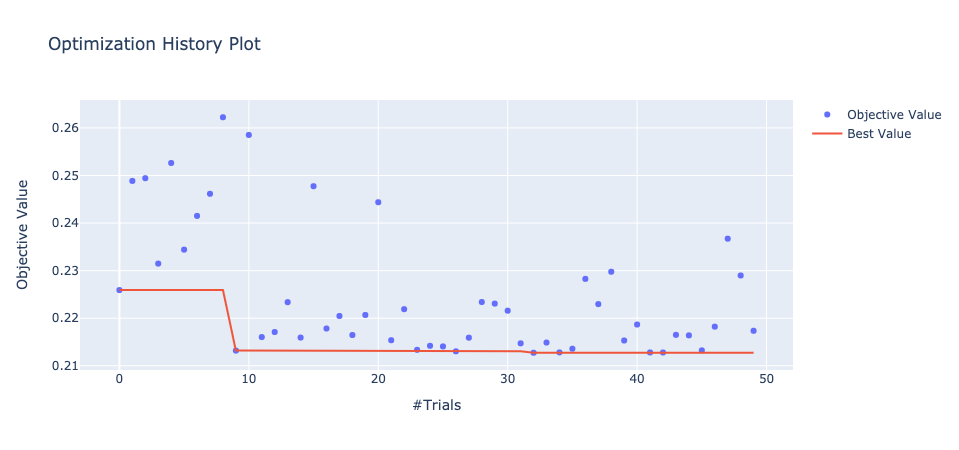

In [124]:
optuna.visualization.plot_optimization_history(study)

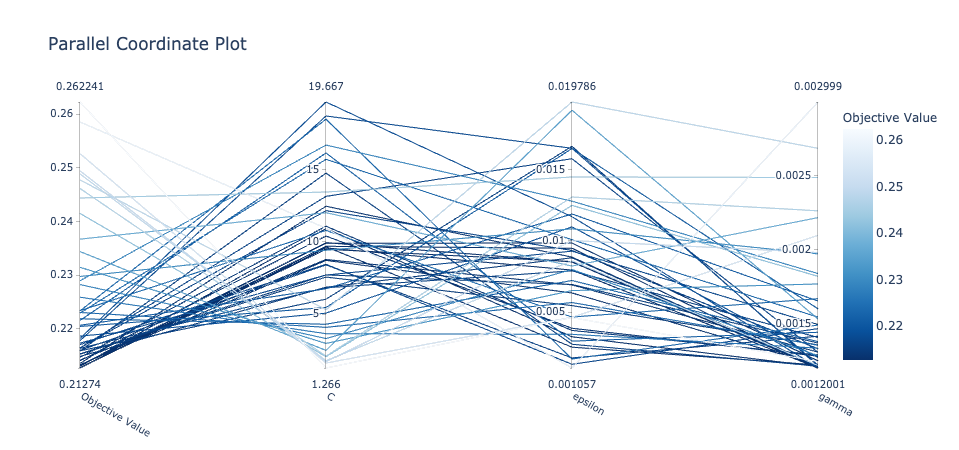

In [125]:
optuna.visualization.plot_parallel_coordinate(study)

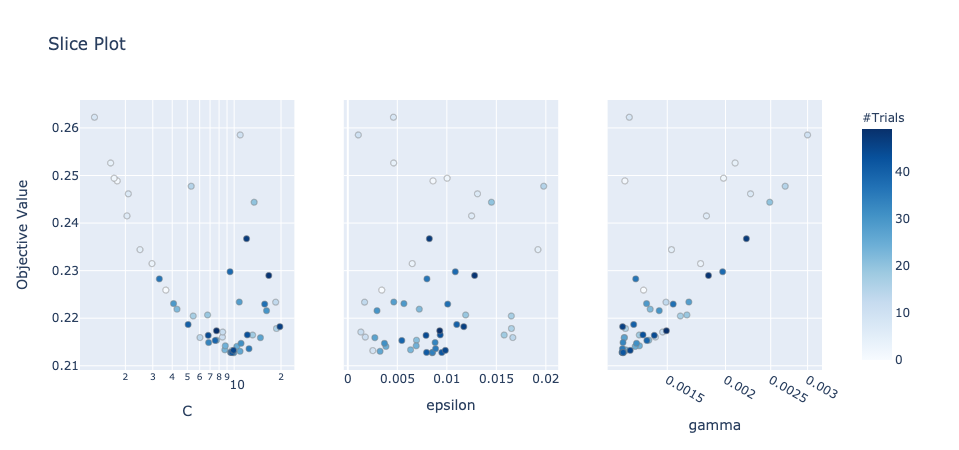

In [126]:
optuna.visualization.plot_slice(study)

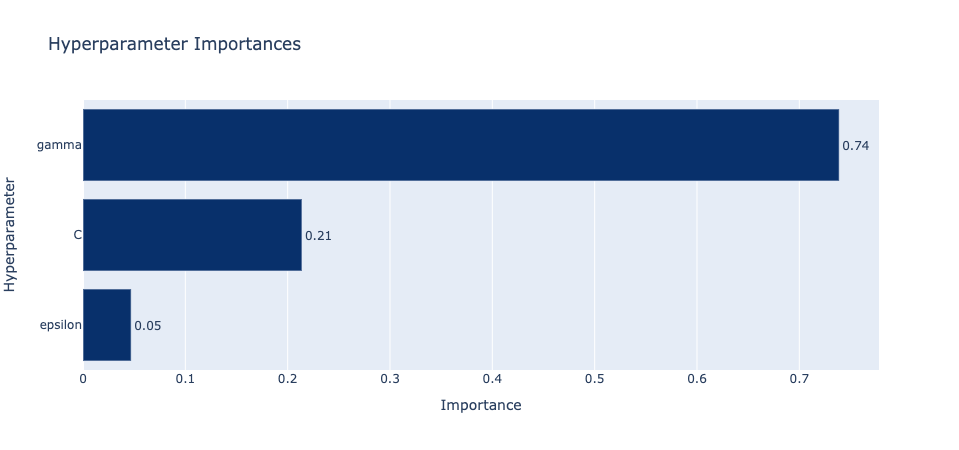

In [127]:
optuna.visualization.plot_param_importances(study)